In [1]:
import scCube
from scCube import scCube
from scCube.visualization import *
from scCube.utils import *
from matplotlib.pyplot import rc_context
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import time
warnings.filterwarnings("ignore")

/slurm/home/yrd/fanlab/qianjingyang/.conda/envs/sccube/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = scCube()

In [3]:
sc_adata = sc.read_h5ad('demo_data/customized_bc_adata.h5ad')

In [4]:
# generate_sc_meta, generate_sc_data = model.train_vae_and_generate_cell(
#     sc_adata=sc_adata,
#     celltype_key='Cell_type',
#     cell_key='Cell',
#     target_num=None,
#     batch_size=512,
#     epoch_num=10000,
#     lr=0.0001,
#     hidden_size=128,
#     save_model=True,
#     save_path='/slurm/home/yrd/fanlab/qianjingyang/workspace/scCube_dev/tutorial/demo_data',
#     project_name='customized_bc',
#     used_device='cuda:0')

generating structured cluster spatial patterns...
no `background_prop` is provided, each background cell type follows an equal proportion...
generating structured stripes spatial patterns...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
no `background_prop` is provided, each background cell type follows an equal proportion...
generating by the targeted proportion of cell types...
loading model from demo_data/customized_bc.pth
vae loading done!


Generate Epoch: 6: 100%|██████████| 5000/5000 [00:00<00:00, 25343.04it/s]


generated done!
data have been prepared!


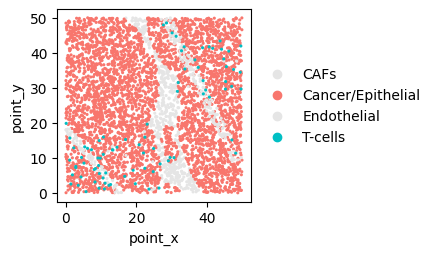

In [6]:
# Cold tumor-immune microenvironment
CustomGenerator = SPatternGeneratorCustom(sc_adata=sc_adata, cell_num=5000, celltype_key='Cell_type',
                                          set_seed=True, seed=12345, spatial_size=50, 
                                          select_celltype=['T-cells', 'Endothelial', 'Cancer/Epithelial', 'CAFs'], )

shape_list = ['Oval', 'Circle', 'Oval', 'Circle', 'Oval', 'Oval', 'Oval', 'Oval']
cluster_purity_list = [0.95, 0.95, 1, 1, 0.95, 1, 0.9, 1]
cluster_celltype_list = ['Cancer/Epithelial', 'Cancer/Epithelial', 'Cancer/Epithelial', 'Cancer/Epithelial', 
                         'Cancer/Epithelial', 'Cancer/Epithelial', 'Cancer/Epithelial', 'Cancer/Epithelial']
infiltration_celltype_list = [['T-cells', 'Endothelial'], ['T-cells', 'Endothelial'], ['T-cells', 'Endothelial'], 
                              ['T-cells', 'Endothelial'], ['T-cells', 'Endothelial'], ['T-cells', 'Endothelial'], 
                              ['T-cells', 'Endothelial'], ['T-cells', 'Endothelial']]
infiltration_prop_list = [[0.8, 0.2], [0.8, 0.2], [0.8, 0.2], [0.8, 0.2], [0.8, 0.2], [0.8, 0.2], [0.8, 0.2], [0.8, 0.2]]
background_celltype = ['CAFs']
background_prop = None
center_x_list = [20, -5, 10, 43, 48, 48, 30, 29]
center_y_list = [-8, 5, 35, 50, 25, 8, 12, 16]
a_list = [20, 32, 20, 20, 20, 25, 3.3, 3.3]
b_list = [12, 32, 15, 20, 15, 12, 2, 2]
theta_list = [np.pi / 1, np.pi / 10, np.pi / 1.5, np.pi / 1.5, np.pi / 1.5, np.pi / 1.5, np.pi / 2, np.pi / 2]
scale_value_list = [4, 4, 4, 4, 4, 4, 4, 4]
twist_value_list=[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

meta_base = CustomGenerator.simulate_cluster(
    shape_list=shape_list,
    cluster_purity_list=cluster_purity_list,
    cluster_celltype_list=cluster_celltype_list,
    infiltration_celltype_list=infiltration_celltype_list,
    infiltration_prop_list=infiltration_prop_list,
    background_celltype=background_celltype,
    background_prop=background_prop,
    center_x_list=center_x_list,
    center_y_list=center_y_list,
    a_list=a_list,
    b_list=b_list,
    theta_list=theta_list,
    scale_value_list=scale_value_list,
    twist_value_list=twist_value_list)

# fig, ax = plt.subplots(figsize=(2.5, 2.5))
# sns.scatterplot(data=meta_base, x="point_x", y="point_y", hue="Cell_type", s=5, linewidth=0, palette=["#00BFC4", "#E5E5E5", "#F8766D", "#E5E5E5"])
# plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
# plt.show()

y1_list = [110, 20]
y2_list = [10, -40]
stripe_width_list = [3, 2]
stripe_celltypee_list = ['Endothelial', 'Endothelial']
stripe_purity_list = [0.6, 0.8]
infiltration_celltype_list = [['Cancer/Epithelial', 'T-cells'], ['Cancer/Epithelial', 'T-cells']]
infiltration_prop_list = [[0.9, 0.1], None]
background_celltype = ['CAFs']
background_prop = None

meta_add = CustomGenerator.simulate_stripes(
    y1_list=y1_list,
    y2_list=y2_list,
    stripe_width_list=stripe_width_list,
    stripe_celltypee_list=stripe_celltypee_list,
    stripe_purity_list=stripe_purity_list,
    infiltration_celltype_list=infiltration_celltype_list,
    infiltration_prop_list=infiltration_prop_list,
    background_celltype=background_celltype,
    background_prop=background_prop,)

# fig, ax = plt.subplots(figsize=(2.5, 2.5))
# sns.scatterplot(data=meta_add, x="point_x", y="point_y", hue="Cell_type", s=5, linewidth=0, palette=["#E5E5E5", "#00BFC4", "#F8766D"])
# plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
# plt.show()

generate_sc_meta, generate_sc_data = model.generate_pattern_custom_complex(
    sc_adata=sc_adata,
    spa_pattern_base=meta_base,
    spa_pattern_add=meta_add,
    celltype_key='Cell_type',
    cell_key='Cell',
    background_celltype=['CAFs'],
    hidden_size=128,
    load_path='demo_data/customized_bc.pth',
    used_device='cuda:0')

fig, ax = plt.subplots(figsize=(2.5, 2.5))
sns.scatterplot(data=generate_sc_meta, x="point_x", y="point_y", hue="Cell_type", s=5, linewidth=0, 
                    palette=["#E5E5E5", "#F8766D", "#E5E5E5", "#00BFC4"])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()

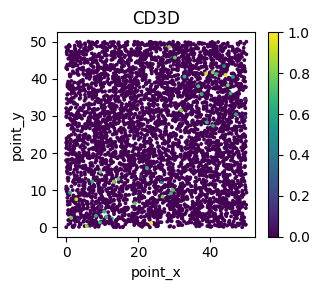

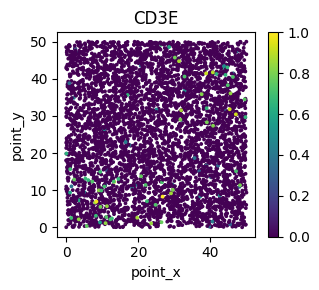

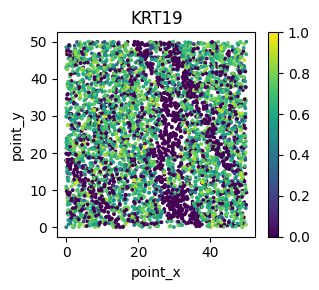

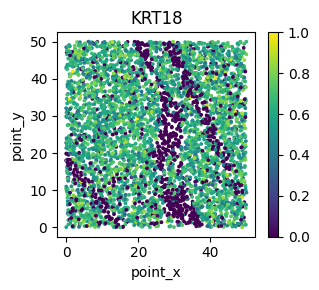

In [7]:
for gene in ['CD3D', 'CD3E', 'KRT19', 'KRT18']:
    plot_gene_scatter(
        data=generate_sc_data,
        obj=generate_sc_meta,
        figwidth=3.3,
        figheight=3,
        dim=2,
        label='Cell',
        normalize=True,
        x="point_x",
        y="point_y",
        show_gene=gene,
        colormap='viridis',
        size=3,
        alpha=1)
    plt.show()

generating structured cluster spatial patterns...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
generating by the targeted proportion of cell types...
loading model from demo_data/customized_bc.pth
vae loading done!


Generate Epoch: 4: 100%|██████████| 5000/5000 [00:00<00:00, 22648.75it/s]


generated done!
data have been prepared!


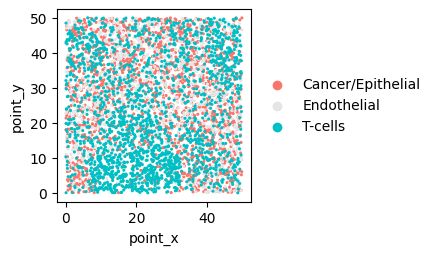

In [8]:
# mixed tumor-immune microenvironment
shape_list = ['Oval', 'Oval', 'Oval', 'Oval', 'Oval', 'Oval']
cluster_purity_list = [0.9, 0.5, 0.5, 0.5, 0.5, 0.5]
cluster_celltype_list = ['T-cells', 'T-cells', 'T-cells', 'T-cells', 'T-cells', 'T-cells']
infiltration_celltype_list = [['Endothelial', 'Cancer/Epithelial'], ['Endothelial', 'Cancer/Epithelial'], 
                              ['Endothelial', 'Cancer/Epithelial'], ['Endothelial', 'Cancer/Epithelial'], 
                              ['Endothelial', 'Cancer/Epithelial'], ['Endothelial', 'Cancer/Epithelial'],]
infiltration_prop_list = [None, [0.2, 0.8], None, None, [0.2, 0.8], None]
background_celltype = ['Endothelial', 'Cancer/Epithelial', 'T-cells']
background_prop = [0.3, 0.45, 0.25]
center_x_list = [20, 38, 18, 20, 5, 50]
center_y_list = [6, 12, 17, 24, 40, 43]
a_list = [13, 7, 9, 7, 7, 15]
b_list = [11, 5, 6, 6, 7, 10]
theta_list = [np.pi / 1, np.pi / 1.5, np.pi / 6, np.pi / 4, np.pi / 4, np.pi / 2]
scale_value_list = [4, 4, 4, 4, 4, 4]
twist_value_list=[0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

generate_sc_meta, generate_sc_data = model.generate_pattern_custom_cluster(
    sc_adata=sc_adata,
    generate_cell_num=5000,
    celltype_key='Cell_type',
    cell_key='Cell',
    set_seed=True,
    seed=12345,
    spatial_size=50,
    select_celltype=['T-cells', 'Endothelial', 'Cancer/Epithelial', 'CAFs'],
    shape_list=shape_list,
    cluster_celltype_list=cluster_celltype_list,
    cluster_purity_list=cluster_purity_list,
    infiltration_celltype_list=infiltration_celltype_list,
    infiltration_prop_list=infiltration_prop_list,
    background_celltype=background_celltype,
    background_prop=background_prop,
    center_x_list=center_x_list,
    center_y_list=center_y_list,
    a_list=a_list,
    b_list=b_list,
    theta_list=theta_list,
    scale_value_list=scale_value_list,
    twist_value_list=twist_value_list,
    hidden_size=128,
    load_path='demo_data/customized_bc.pth',
    used_device='cuda:0')

fig, ax = plt.subplots(figsize=(2.5, 2.5))
sns.scatterplot(data=generate_sc_meta, x="point_x", y="point_y", hue="Cell_type", s=5, linewidth=0, 
                    palette=["#F8766D", "#E5E5E5",  "#00BFC4",])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()

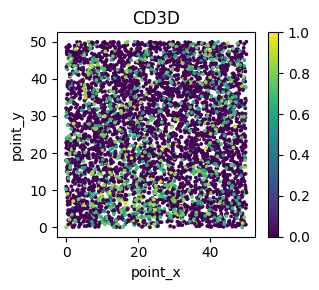

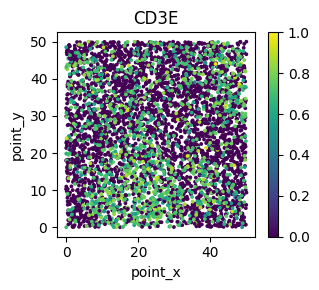

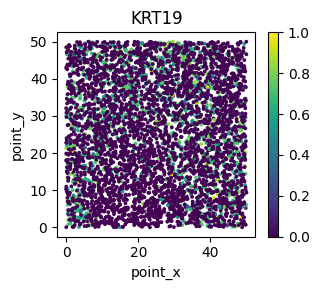

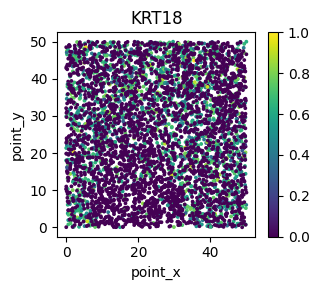

In [9]:
for gene in ['CD3D', 'CD3E', 'KRT19', 'KRT18']:
    plot_gene_scatter(
        data=generate_sc_data,
        obj=generate_sc_meta,
        figwidth=3.3,
        figheight=3,
        dim=2,
        label='Cell',
        normalize=True,
        x="point_x",
        y="point_y",
        show_gene=gene,
        colormap='viridis',
        size=3,
        alpha=1)
    plt.show()

generating structured immune ring spatial patterns...
generating by the targeted proportion of cell types...
loading model from demo_data/customized_bc.pth
vae loading done!


Generate Epoch: 3: 100%|██████████| 5000/5000 [00:00<00:00, 62073.65it/s]


generated done!
data have been prepared!


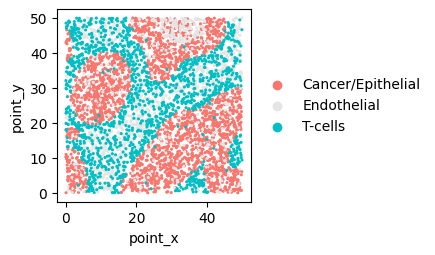

In [10]:
# compartmentalized tumor-immune microenvironment
shape_list = ['Oval', 'Oval', 'Oval', 'Oval', 'Oval', 'Oval', 'Oval', 'Oval', 'Oval', 'Oval', 
              'Oval', 'Oval']
ring_purity_list = [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1, 0.6]
ring_celltype_list = [['Cancer/Epithelial', 'T-cells'], ['Cancer/Epithelial', 'T-cells'], ['Cancer/Epithelial', 'T-cells'], 
                      ['Cancer/Epithelial', 'T-cells'], ['Cancer/Epithelial', 'T-cells'], ['Cancer/Epithelial', 'T-cells'], 
                      ['Cancer/Epithelial', 'T-cells'], ['Cancer/Epithelial', 'T-cells'], ['Cancer/Epithelial', 'T-cells'],
                      ['Cancer/Epithelial', 'T-cells'], ['T-cells', 'Cancer/Epithelial'], ['Endothelial', 'Cancer/Epithelial']]
infiltration_celltype_list = [['Endothelial', 'T-cells'], ['Endothelial', 'T-cells'], 
                              ['Endothelial', 'T-cells'], ['Endothelial', 'T-cells'], 
                              ['Endothelial', 'T-cells'], ['Endothelial', 'T-cells'],
                              ['Endothelial', 'T-cells'], ['Endothelial', 'T-cells'], 
                              ['Endothelial', 'T-cells'], ['Endothelial', 'T-cells'], 
                              ['Endothelial', 'T-cells'], ['Cancer/Epithelial'],]
infiltration_prop_list = [[0.9, 0.1], [0.9, 0.1], [0.9, 0.1], [0.9, 0.1], [0.9, 0.1], [0.9, 0.1], [0.9, 0.1], 
                          [0.9, 0.1], [0.9, 0.1], [0.9, 0.1], [0.5, 0.5], [1]]
background_celltype = ['Endothelial', 'T-cells']
background_prop = [0.6, 0.4]
center_x_list = [10, 2, 2, 30, 45, 32, 30, 33, 48, -2, 54, 33]
center_y_list = [30, 5, 17, 10, 22, 48, 45, 17, 8, 42, 15, 48]
a_list = [11, 8, 2, 20, 12, 14, 14, 8, 10, 6, 10, 7]
b_list = [8, 4, 2, 7.5, 6, 10, 6, 6, 7.7, 4, 5, 5]
theta_list = [np.pi / 2.8, np.pi / 1.8, np.pi / 6, np.pi / 4, np.pi / 5, np.pi / 1, np.pi / 2.5, np.pi / 5, np.pi / 3.6, np.pi / 2, 
              np.pi / 4, np.pi / 1]
ring_width_list=[[2], [2], [2], [2], [2], [2], [2], [4], [2], [3], [2], [0]]

generate_sc_meta, generate_sc_data = model.generate_pattern_custom_ring(
    sc_adata=sc_adata,
    generate_cell_num=5000,
    celltype_key='Cell_type',
    cell_key='Cell',
    set_seed=True,
    seed=12345,
    spatial_size=50,
    select_celltype=['T-cells', 'Endothelial', 'Cancer/Epithelial', 'CAFs'],
    shape_list=shape_list,
    ring_purity_list=ring_purity_list,
    ring_celltype_list=ring_celltype_list,
    infiltration_celltype_list=infiltration_celltype_list,
    infiltration_prop_list=infiltration_prop_list,
    background_celltype=background_celltype,
    background_prop=background_prop,
    center_x_list=center_x_list,
    center_y_list=center_y_list,
    a_list=a_list,
    b_list=b_list,
    theta_list=theta_list,
    ring_width_list=ring_width_list,
    hidden_size=128,
    load_path='demo_data/customized_bc.pth',
    used_device='cuda:0')

fig, ax = plt.subplots(figsize=(2.5, 2.5))
sns.scatterplot(data=generate_sc_meta, x="point_x", y="point_y", hue="Cell_type", s=5, linewidth=0, 
                    palette=["#F8766D", "#E5E5E5",  "#00BFC4",])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()

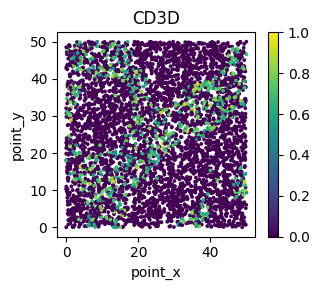

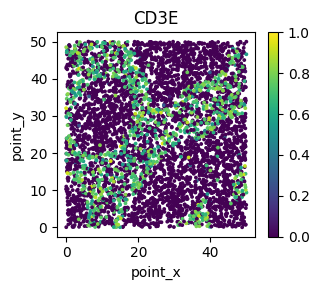

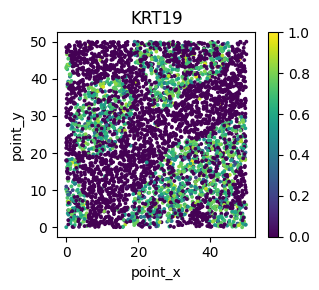

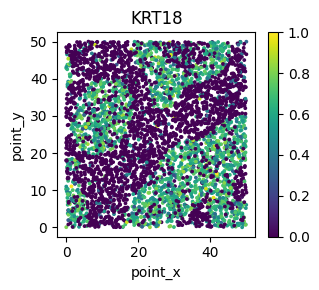

In [11]:
for gene in ['CD3D', 'CD3E', 'KRT19', 'KRT18']:
    plot_gene_scatter(
        data=generate_sc_data,
        obj=generate_sc_meta,
        figwidth=3.3,
        figheight=3,
        dim=2,
        label='Cell',
        normalize=True,
        x="point_x",
        y="point_y",
        show_gene=gene,
        colormap='viridis',
        size=3,
        alpha=1)
    plt.show()